<a href="https://colab.research.google.com/github/KavinAgrawal/ML-Techniques/blob/master/Perceptron_Learning_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [0]:
class Perceptron():
  
  def __init__(self,learn_rate,no_iters,rand_state=1):
    self.learn_rate = learn_rate
    self.no_iters = no_iters
    self.rand_state = rand_state
    
  def fit(self, x, y):
    rgen = np.random.RandomState(self.rand_state)
    self.w = rgen.normal(loc=0.0, scale=0.01,size=1 + x.shape[1])
#     self.w = np.random.normal(loc=0.0, scale=0.01, size=1+x.shape[1])
    self.errors = []
    for i in range(self.no_iters):
      errors=0
      for xj,target in zip(x,y):
        update = self.learn_rate * (target - self.predict(xj))
        self.w[1:]+=update*xj #Doubt Line
        self.w[0]+=update
        errors += int(update != 0.0) # Doubt line
      self.errors.append(errors)
    return self 
  
  def net_input(self, X):
    return np.dot(X, self.w[1:]) + self.w[0]
     
  def predict(self,x):
    return np.where(self.net_input(x) >= 0.0, 1, -1)
  


In [0]:
  df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
df.tail() #tail method more useful because it also shows the final no of columns

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [0]:
y = df.iloc[0:100,4].values
y = np.where(y=='Iris-setosa',1,-1)
x = df.iloc[0:100, [0, 2]].values

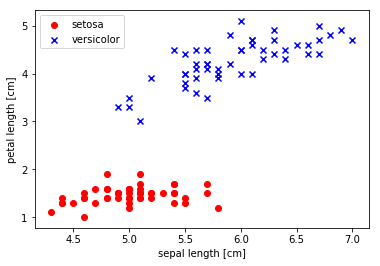

In [0]:
plt.scatter(x[:50, 0], x[:50, 1],color='red', marker='o', label='setosa')
plt.scatter(x[50:100, 0], x[50:100, 1],color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

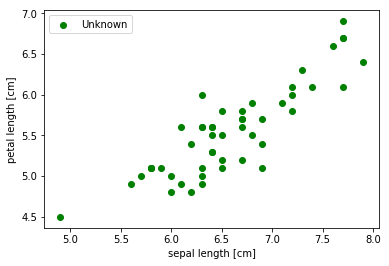

In [0]:
plt.scatter(x_test[:50, 0], x_test[:50, 1],color='green', marker='o', label='Unknown')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

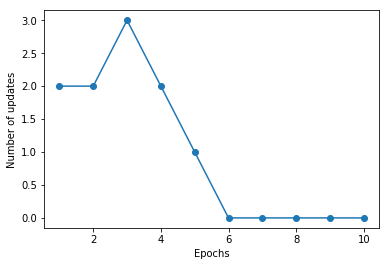

In [0]:
model = Perceptron(learn_rate=0.1,no_iters=10)
model.fit(x,y)

plt.plot(range(1, len(model.errors) + 1),model.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [0]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
  np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  
  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.8,c=colors[idx],marker=markers[idx],label=cl,edgecolor='black')

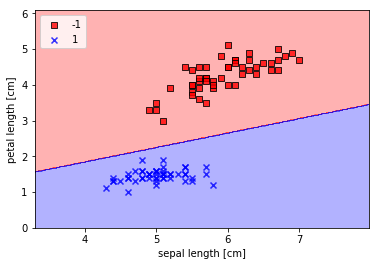

In [0]:
plot_decision_regions(x, y, classifier=model)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()